In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import pickle
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm
import panel as pn
from pmdarima.arima import auto_arima
from xgboost import XGBRegressor
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.5 MB/s eta 0:00:00


In [ ]:
#Menyiapkan data dan memanggil dataset
from google.colab import drive
drive.mount('/content/drive')
data_set = pd.read_csv('/content/drive/MyDrive/TUGAS AKHIR KURS/kurs_rupiah1.csv')

Mounted at /content/drive


In [ ]:
df = data_set['Kurs']
df

0       13767
1       13771
2       13771
3       13759
4       13747
        ...  
1245    14897
1246    14878
1247    14905
1248    14952
1249    14959
Name: Kurs, Length: 1250, dtype: int64

In [ ]:
#Training and test sets
train = df[:1000]
test = df[1000:]

In [ ]:
adfuller(df)

(-3.5103344386327464,
 0.0077256167413317315,
 12,
 1237,
 {'1%': -3.4356474307506084,
  '5%': -2.8638793281844253,
  '10%': -2.5680154897465575},
 13607.67975483472)

# Uji Stasioneritas

In [ ]:
adf_result = adfuller(df)
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])

if adf_result[1] > 0.05:
    print("Data Tidak Stasioner")
else:
    print("Data Stasioner")

ADF Statistic: -3.510334
p-value: 0.007726
Data Stasioner


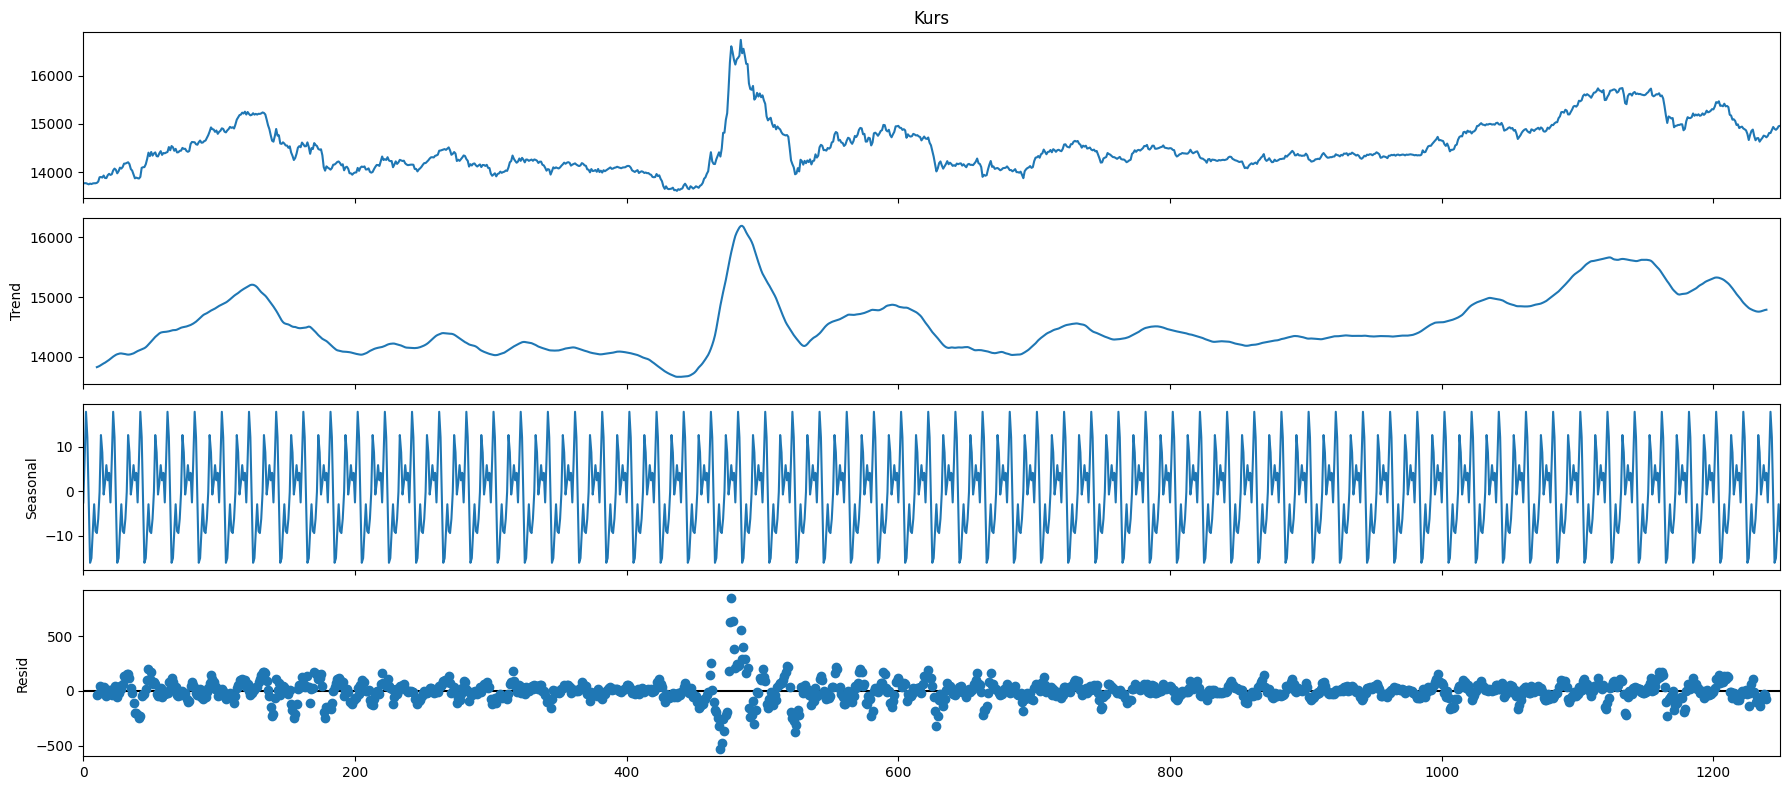

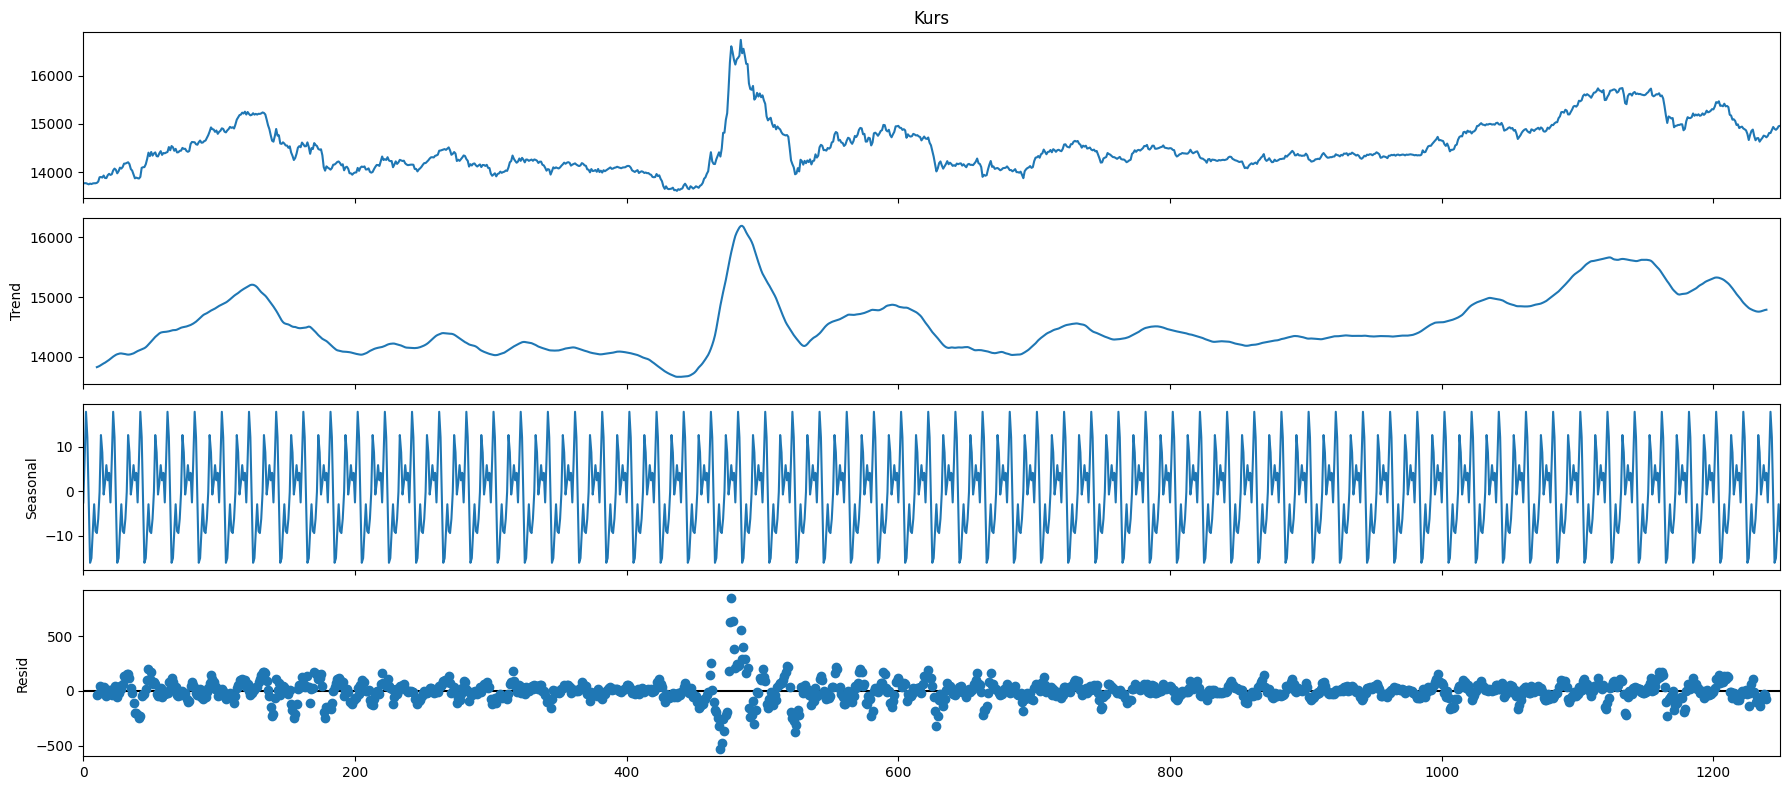

In [ ]:
# Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
from statsmodels.tsa.seasonal import seasonal_decompose
sd_result = seasonal_decompose(df, model='additive', period=20)
sd_result.plot()

# Identifikasi Model (ACF dan PACF)

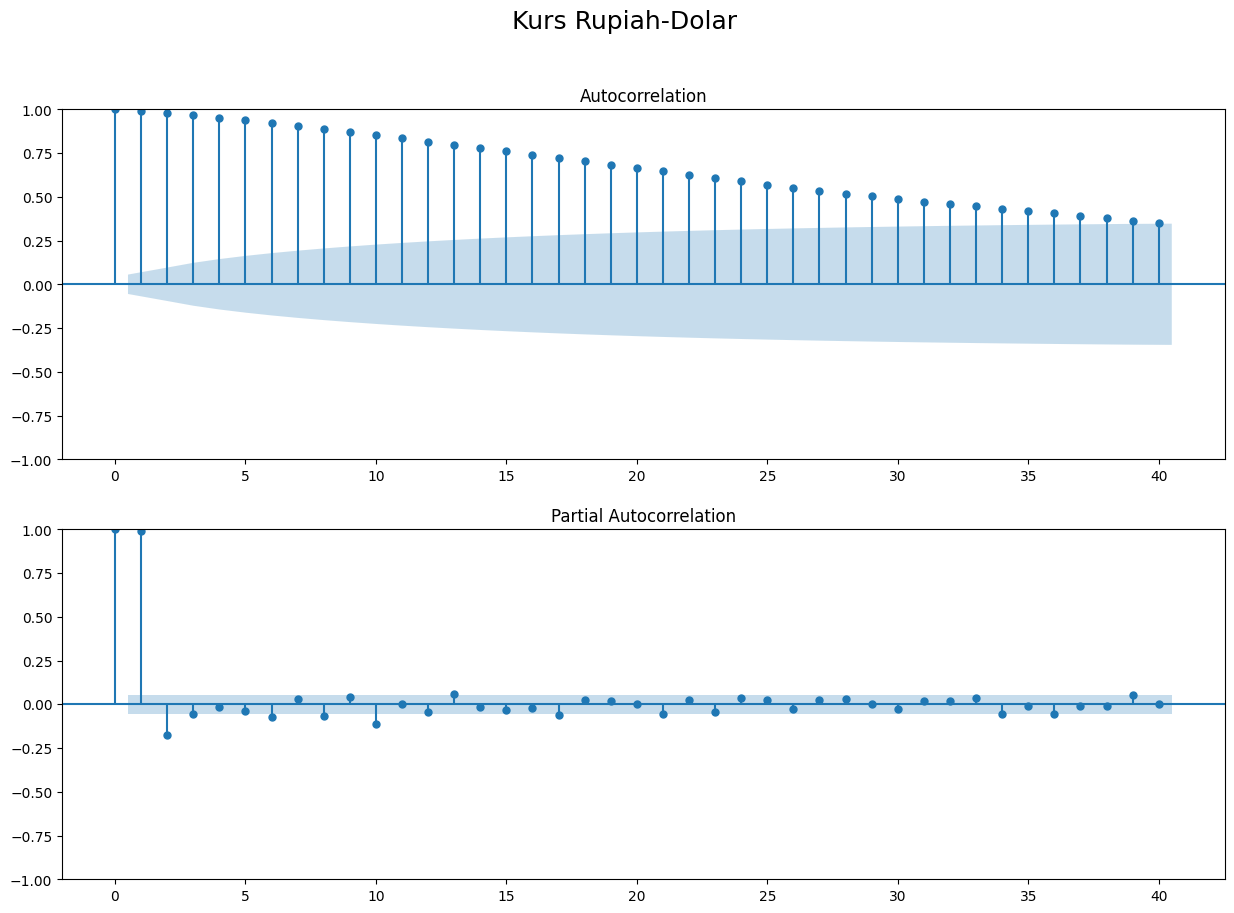

In [ ]:
# auto-correlation and partial auto-correlation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f = plt.figure(figsize=(15,10))
f.suptitle("Kurs Rupiah-Dolar", fontsize=18)
ax1 = f.add_subplot(211)
fig = plot_acf(df, lags=40, ax=ax1)
ax2 = f.add_subplot(212)
fig = plot_pacf(df, lags=40, ax=ax2)

stat : 336.990 , p : 0.000
Tidak Berdistribusi Normal


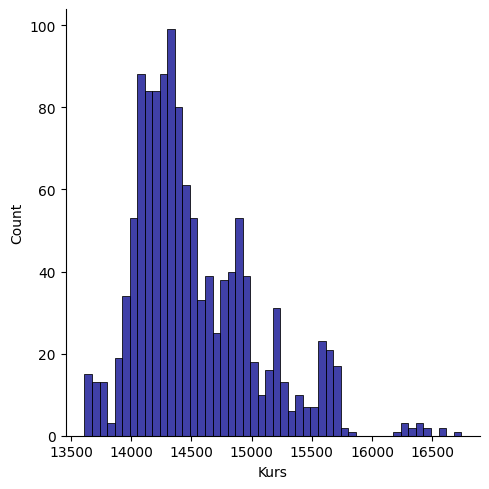

In [ ]:
import seaborn as sns
sns.displot(df,kind="hist",color='darkblue',bins=50,kde_kws={'linewidth': 4,'shade':True})

# Jarque-Bera test
from scipy.stats import jarque_bera
stat,p = jarque_bera(df)

print("stat : %.3f , p : %.3f" %(stat,p))

if p > 0.05:
    print("Berdistribusi Normal")
else:
    print("Tidak Berdistribusi Normal")

In [ ]:
model = auto_arima(df, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13879.067, Time=6.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13937.922, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13891.207, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13897.076, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13936.199, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13888.804, Time=2.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13888.177, Time=2.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13880.014, Time=2.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13880.532, Time=3.76 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13889.307, Time=1.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13889.522, Time=2.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13893.746, Time=0.25 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13888.835, Time=3.72 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13877.208, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1250
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6933.604
Date:                Tue, 15 Aug 2023   AIC                          13877.208
Time:                        00:16:21   BIC                          13902.858
Sample:                             0   HQIC                         13886.851
                               - 1250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2548      0.078     -3.253      0.001      -0.408      -0.101
ar.L2          0.5673      0.053     10.712      0.000       0.463       0.671
ma.L1          0.4472      0.086      5.202      0.0

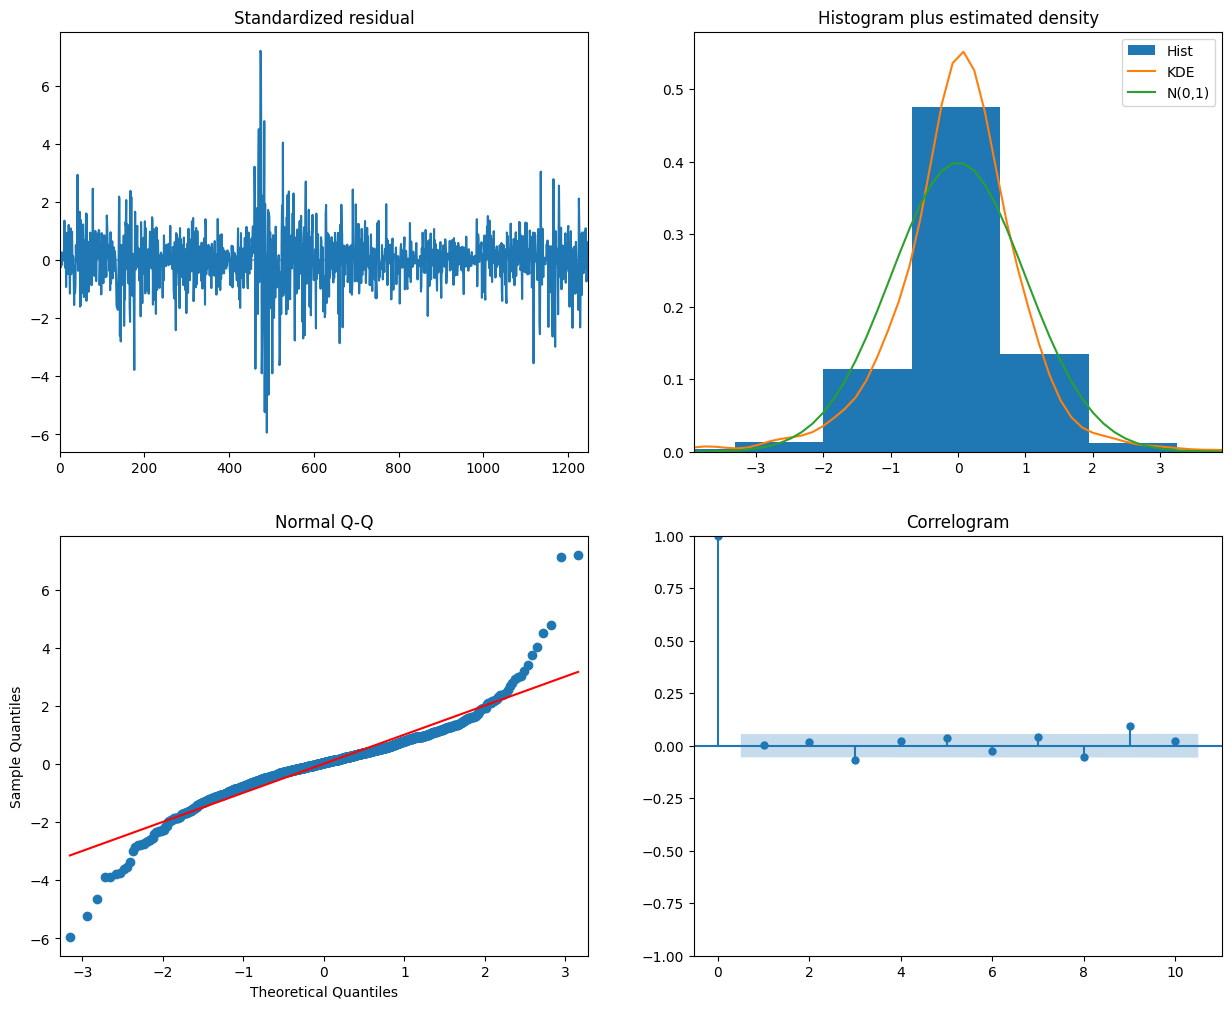

In [ ]:
model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Kurs   No. Observations:                 1000
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5575.418
Date:                Tue, 15 Aug 2023   AIC                          11160.836
Time:                        00:16:54   BIC                          11185.370
Sample:                             0   HQIC                         11170.161
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2046      0.319      3.773      0.000       0.579       1.830
ar.L2         -0.2955      0.241     -1.229      0.219      -0.767       0.176
ma.L1         -1.0211      0.324     -3.150      0.002      -1.656      -0.386
ma.L2          0.1673      0.201      0.832      0.405      -0.227       0.561
sigma2      4117.6856     90.700     45.399      0.000    3939.917    4295.454
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3014.52
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=0,end=len(train)-1,typ='levels').rename('Prediksi')
print(pred)

0          0.000000
1      13779.025489
2      13775.763108
3      13773.380436
4      13758.402672
           ...     
995    14629.828272
996    14661.881258
997    14692.882748
998    14745.305974
999    14654.660572
Name: Prediksi, Length: 1000, dtype: float64


In [ ]:
import statsmodels.api as sm
# Membangun model ARIMA pada data test
model2 = sm.tsa.ARIMA(test, order=(2, 1, 2))
model2_fit = model2.fit()
# Menampilkan ringkasan hasil model ARIMA pada data test
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Kurs   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1352.026
Date:                Tue, 15 Aug 2023   AIC                           2714.052
Time:                        00:17:06   BIC                           2731.639
Sample:                             0   HQIC                          2721.131
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0545      0.600     -0.091      0.928      -1.231       1.122
ar.L2         -0.3902      0.267     -1.461      0.144      -0.914       0.133
ma.L1          0.2265      0.599      0.378      0.7

In [ ]:
start2 =len(df)
end2   =len(df)+10
pred2=model2_fit.predict(start=start2,end=end2,typ='levels').rename('ARIMA Predictions')
print(pred2)

2250    14953.63873
2251    14953.63873
2252    14953.63873
2253    14953.63873
2254    14953.63873
2255    14953.63873
2256    14953.63873
2257    14953.63873
2258    14953.63873
2259    14953.63873
2260    14953.63873
Name: ARIMA Predictions, dtype: float64


In [ ]:
# Melanjutkan prediksi ke masa depan setelah data uji
# Membangun model ARIMA pada data test
model2 = sm.tsa.ARIMA(test, order=(2, 1, 2))
model2_fit = model2.fit()
future_periods = 100  # Jumlah periode ke depan yang ingin diprediksi
future_predictions = model2_fit.forecast(steps=future_periods)

print('Prediksi untuk masa depan:', future_predictions)

Prediksi untuk masa depan: 1250    14953.040855
1251    14951.579205
1252    14953.984220
1253    14954.423586
1254    14953.461161
            ...     
1345    14953.638730
1346    14953.638730
1347    14953.638730
1348    14953.638730
1349    14953.638730
Name: predicted_mean, Length: 100, dtype: float64


In [ ]:
import statsmodels.api as sm

# Membangun model ARIMA pada data test
model2 = sm.tsa.ARIMA(test, order=(2, 1, 2))
model2_fit = model2.fit()

# Melakukan prediksi dengan model yang telah di-fit
n_forecast_periods = 11  # Ganti dengan jumlah periode yang ingin Anda prediksi
pred2 = model2_fit.get_forecast(steps=n_forecast_periods, alpha=0.05)  # Menggunakan interval kepercayaan 95%
pred2_mean = pred2.predicted_mean
pred2_conf_int = pred2.conf_int()

# Menampilkan hasil prediksi
print("Prediksi Mean:")
print(pred2_mean)

print("\nInterval Kepercayaan (95%):")
print(pred2_conf_int)


Prediksi Mean:
1250    14953.040855
1251    14951.579205
1252    14953.984220
1253    14954.423586
1254    14953.461161
1255    14953.342134
1256    14953.724178
1257    14953.749815
1258    14953.599336
1259    14953.597529
1260    14953.656347
Name: predicted_mean, dtype: float64

Interval Kepercayaan (95%):
        lower Kurs    upper Kurs
1250  14844.668530  15061.413180
1251  14784.612579  15118.545831
1252  14748.338073  15159.630367
1253  14719.701236  15189.145937
1254  14691.528933  15215.393389
1255  14665.739539  15240.944728
1256  14643.072560  15264.375796
1257  14621.966069  15285.533561
1258  14601.760391  15305.438281
1259  14582.683965  15324.511092
1260  14564.675136  15342.637559


In [ ]:
# Melakukan prediksi pada data latih
start_train_idx = 0
end_train_idx = len(train) - 1
train_predictions = model.predict(start=start_train_idx, end=end_train_idx, typ='levels')
# Mengganti nilai 0 dengan nilai lain (misalnya -1)
replacement_value = 13779.025489
train_predictions = train_predictions.replace(0, replacement_value)

# Menampilkan hasil prediksi yang sudah diganti
print(train_predictions)

0      13779.025489
1      13779.025489
2      13775.763108
3      13773.380436
4      13758.402672
           ...     
995    14629.828272
996    14661.881258
997    14692.882748
998    14745.305974
999    14654.660572
Name: predicted_mean, Length: 1000, dtype: float64


In [ ]:
# Melakukan prediksi pada data uji
start_test_idx = len(train)
end_test_idx = len(df) - 1
test_predictions = model.predict(start=start_test_idx, end=end_test_idx, typ='levels')
print(test_predictions)

1000    14665.846738
1001    14667.413928
1002    14669.051527
1003    14670.561030
1004    14671.895420
            ...     
1245    14680.330087
1246    14680.330087
1247    14680.330087
1248    14680.330087
1249    14680.330087
Name: predicted_mean, Length: 250, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
# Menghitung MSE terhadap data latih dan data uji
mse_train = mean_squared_error(train, train_predictions)
mse_test = mean_squared_error(test, test_predictions)

print('MSE terhadap data latih:', mse_train)
print('MSE terhadap data uji:', mse_test)

MSE terhadap data latih: 193648.00657448603
MSE terhadap data uji: 323247.1860737132


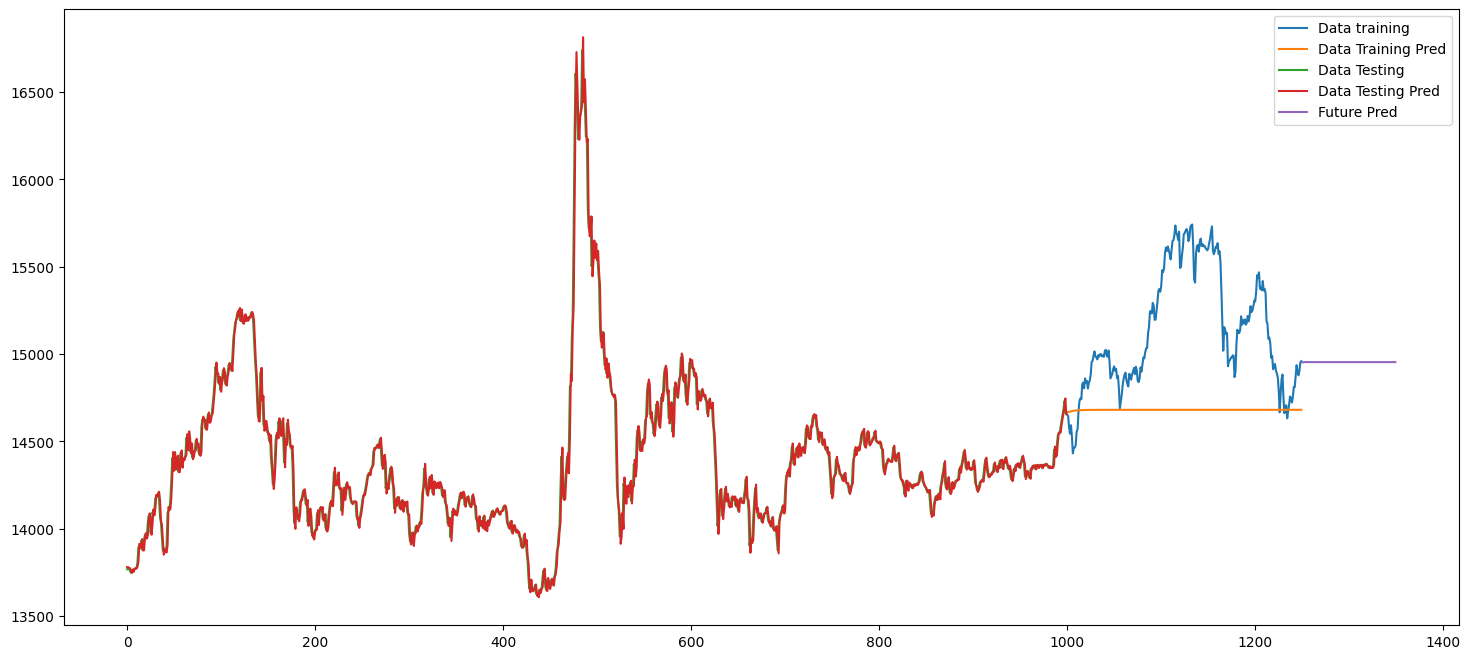

In [ ]:
#plot
plt.plot(test)
plt.plot(test_predictions)
plt.plot(train)
plt.plot(train_predictions)
plt.plot(future_predictions)
plt.plot
plt.legend(['Data training','Data Training Pred', 'Data Testing', 'Data Testing Pred','Future Pred'])